In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df_gender = pd.read_csv("gender_submission.csv")
df_test   = pd.read_csv("test.csv")
df_train  = pd.read_csv("train.csv")

### Output Format

In [4]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Data size

In [12]:
'train: ', df_train.shape, 'test: ', df_test.shape

('train: ', (891, 12), 'test: ', (418, 11))

### Features

In [25]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


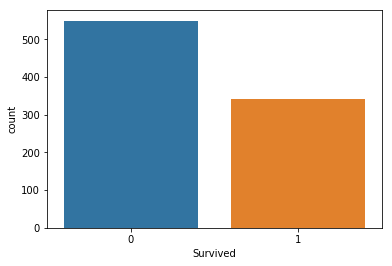

In [5]:
sns.countplot(df_train['Survived'])

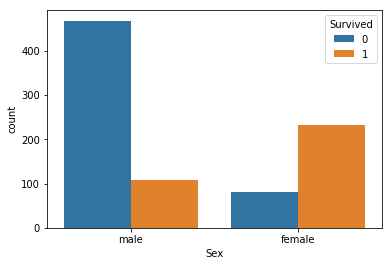

In [7]:
sns.countplot(df_train['Sex'], hue=df_train['Survived'])

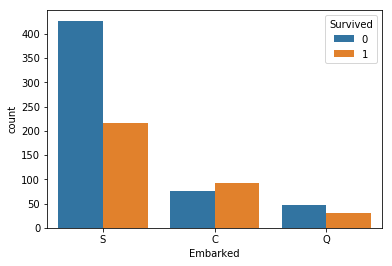

In [8]:
sns.countplot(df_train['Embarked'], hue=df_train['Survived'])

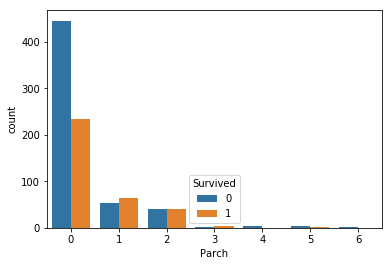

In [16]:
sns.countplot(df_train['Parch'], hue=df_train['Survived'])

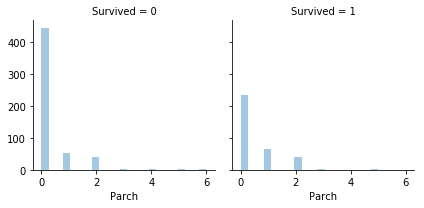

In [13]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

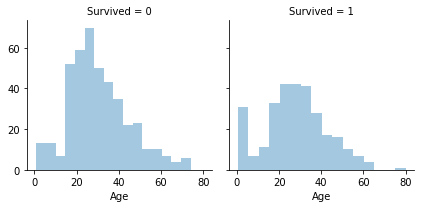

In [15]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

In [18]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Feature Engineer

#### NA

In [61]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].mean())
df_train["Cabin"] = df_train['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

#### Categorize string value

In [62]:
df_train['Sex'] = df_train['Sex'].astype('category').cat.codes
df_train['Embarked'] = df_train['Embarked'].astype('category').cat.codes
df_train['Pclass'] = df_train['Pclass'].astype('category').cat.codes
df_train['Name'] = df_train['Name'].astype('category').cat.codes
df_train['Cabin'] = df_train['Cabin'].astype('category').cat.codes
df_train['Ticket'] = df_train['Ticket'].astype('category').cat.codes

In [ ]:
# dataAgeNull = data[data["Age"].isnull()]
# dataAgeNotNull = data[data["Age"].notnull()]
# remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
#                       (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))                     
#                      ]
# rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
# ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']
# rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

# ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
# dataAgeNull.loc[:,"Age"] = ageNullValues
# data = dataAgeNull.append(dataAgeNotNull)
# data.reset_index(inplace=True, drop=True)

In [40]:
df_train['Survived'].isnull().sum()

0

In [63]:
for col in df_train.columns:
    if df_train[col].isnull().sum():
        print(col)

### Data split

In [64]:
train, test = train_test_split(df_train, test_size=0.1)

In [67]:
X_train = train.drop('Survived', axis=1)
X_test  = test.drop('Survived', axis=1)
Y_train = train['Survived']
Y_test  = test['Survived']

In [35]:
train.shape, test.shape

((801, 12), (90, 12))

## Random Forest

In [66]:
from  sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

rf.fit(X_train, Y_train)
print("%.4f" % rf.oob_score_)

0.8340


In [75]:
rf_pred = rf.predict(X_test)

In [79]:
(rf_pred == Y_test).mean()

0.85555555555555551

### Linear regression

In [69]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
lin_pred = linreg.predict(X_test) > 0.5

In [81]:
(lin_pred == Y_test).mean()

0.81111111111111112

### Logistic regression

In [72]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
log_pred = logreg.predict(X_test)

In [83]:
(log_pred == Y_test).mean()

0.81111111111111112